In [8]:
from choice_model import ChoiceModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
old_model = ChoiceModel()
old_data = pd.DataFrame(columns=['period','PPI','CVI','DCI','Number'])

In [10]:
for period in range(1,10):
    old_model.roll_back(period)
    PPI,CVI,DCI = old_model.evaluate()
    num = len(list(old_model.graph.nodes))
    old_data.loc[len(old_data)] = [period,PPI,CVI,DCI,num]
    old_model.visualize(file_name=f"old_graph/period_{period}.html")

In [11]:
old_data

,period,PPI,CVI,DCI,Number
0,1.0,0.362038,3.980198,0.016393,173.0
1,2.0,0.344548,4.083333,0.009901,292.0
2,3.0,0.384506,4.483607,0.006452,458.0
3,4.0,0.401504,4.693431,0.005319,527.0
4,5.0,0.405878,4.657895,0.004831,595.0
5,6.0,0.407511,4.580060,0.004425,670.0
6,7.0,0.408266,4.607143,0.004149,770.0
7,8.0,0.399104,4.609572,0.003891,850.0
8,9.0,0.401623,4.614610,0.003891,851.0


In [12]:

new_data = pd.DataFrame(columns=['period','PPI','CVI','DCI','Number'])

In [13]:
for period in range(1,10):
    file = f'new_graph/new_graph_{period}.pkl'
    new_model = ChoiceModel(graph_path=file) 
    num = len(list(new_model.graph.nodes))
    PPI,CVI,DCI = new_model.evaluate()
    new_data.loc[len(new_data)] = [period,PPI,CVI,DCI,num]

In [14]:
new_data

,period,PPI,CVI,DCI,Number
0,1.0,0.288525,5.620000,0.00000,163.0
1,2.0,0.711463,4.125749,0.06250,281.0
2,3.0,0.728975,4.405128,0.09375,358.0
3,4.0,0.747900,4.538462,0.09375,358.0
4,5.0,0.762620,4.681223,0.09375,434.0
5,6.0,0.779977,4.799127,0.09375,434.0
6,7.0,0.779950,4.807860,0.09375,434.0
7,8.0,0.779950,4.807860,0.09375,434.0
8,9.0,0.779950,4.807860,0.09375,434.0


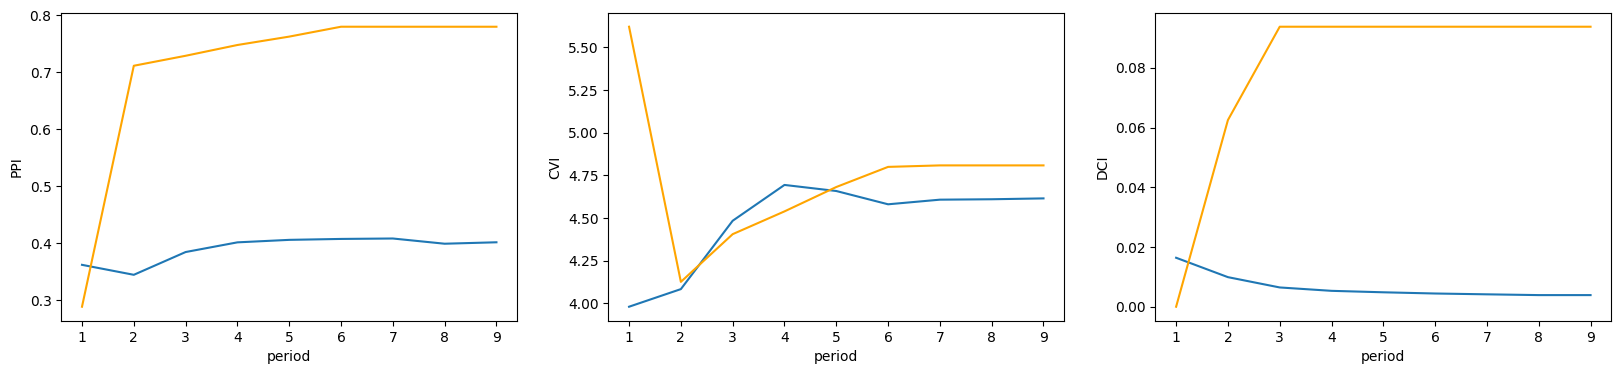

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,3, figsize=(20,4))

sns.lineplot(data=old_data, x='period', y='PPI', ax=ax[0])
sns.lineplot(data=new_data, x='period', y='PPI', ax=ax[0], color='orange')
sns.lineplot(data=old_data, x='period', y='CVI', ax=ax[1])
sns.lineplot(data=new_data, x='period', y='CVI', ax=ax[1], color='orange')
sns.lineplot(data=old_data, x='period', y='DCI', ax=ax[2])
sns.lineplot(data=new_data, x='period', y='DCI', ax=ax[2], color='orange')
plt.show()